# Micro-narrative analysis of _Reddit comments after ChatGPT launch_

Start with the notebook about _Lord of the Rings_ before going through this!

We roughly try to replicate the analysis, but jump some hoops where things differ.

In [57]:
import os
from datetime import date

import pandas as pd

data = pd.read_json("input/chatgpt-reddit-comments.jsonl", lines=True)

data.head()

subreddit_id  approved_at_utc  author_is_blocked  comment_type  edited  \
0    t5_7hqomg              NaN              False           NaN       0   
1    t5_7hqomg              NaN              False           NaN       0   
2    t5_7hqomg              NaN              False           NaN       0   
3    t5_7hqomg              NaN              False           NaN       0   
4    t5_7hqomg              NaN              False           NaN       0   

   mod_reason_by  banned_by   ups  num_reports author_flair_type  ...  \
0            NaN        NaN  1229          NaN              text  ...   
1            NaN        NaN   246          NaN              text  ...   
2            NaN        NaN    62          NaN              text  ...   
3            NaN        NaN    87          NaN               NaN  ...   
4            NaN        NaN    13          NaN               NaN  ...   

   subreddit_name_prefixed controversiality author_flair_background_color  \
0                r/ChatGPT                0                          None   
1                r/ChatGPT                0                          None   
2                r/ChatGPT                0                          None   
3                r/ChatGPT                0                                 
4                r/ChatGPT                0                                 

   collapsed_because_crowd_control mod_reports mod_note  distinguished  \
0                              NaN          []      NaN           None   
1                              NaN          []      NaN           None   
2                              NaN          []      NaN           None   
3                              NaN          []      NaN           None   
4                              NaN          []      NaN           None   

  media_metadata  author_cakeday  editable  
0            NaN             NaN       NaN  
1            NaN             NaN       NaN  
2            NaN             NaN       NaN  
3            NaN             NaN       NaN  
4            NaN             NaN       NaN  

[5 rows x 72 columns]

In [2]:
docs = data["body"]
categories = data["subreddit"]
timestamps = [date.fromtimestamp(d) for d in data["created_utc"]]

In [3]:
from narrativegraphs import CooccurrenceGraph

if os.path.exists("chatgpt_reddit.db"):
    model = CooccurrenceGraph.load("chatgpt_reddit.db")
else:
    model = CooccurrenceGraph(
        sqlite_db_path="chatgpt_reddit.db",
        on_existing_db="overwrite",
        n_cpu=-1
    ).fit(docs, categories=categories, timestamps=timestamps)

INFO:narrativegraphs.pipeline:Adding 52412 documents to database
INFO:narrativegraphs.pipeline:Extracting entities


Extracting entities:   0%|          | 0/52412 [00:00<?, ?it/s]

INFO:narrativegraphs.nlp.extraction:Using multiple CPU cores. Progress may stand still at first.
INFO:narrativegraphs.pipeline:Resolving entities
INFO:narrativegraphs.pipeline:Mapping tuplets
INFO:narrativegraphs.pipeline:Calculating stats


## PMI weighting of entity cooccurrences

We ensure that PMI shows the same properties in this corpus as in LotR.

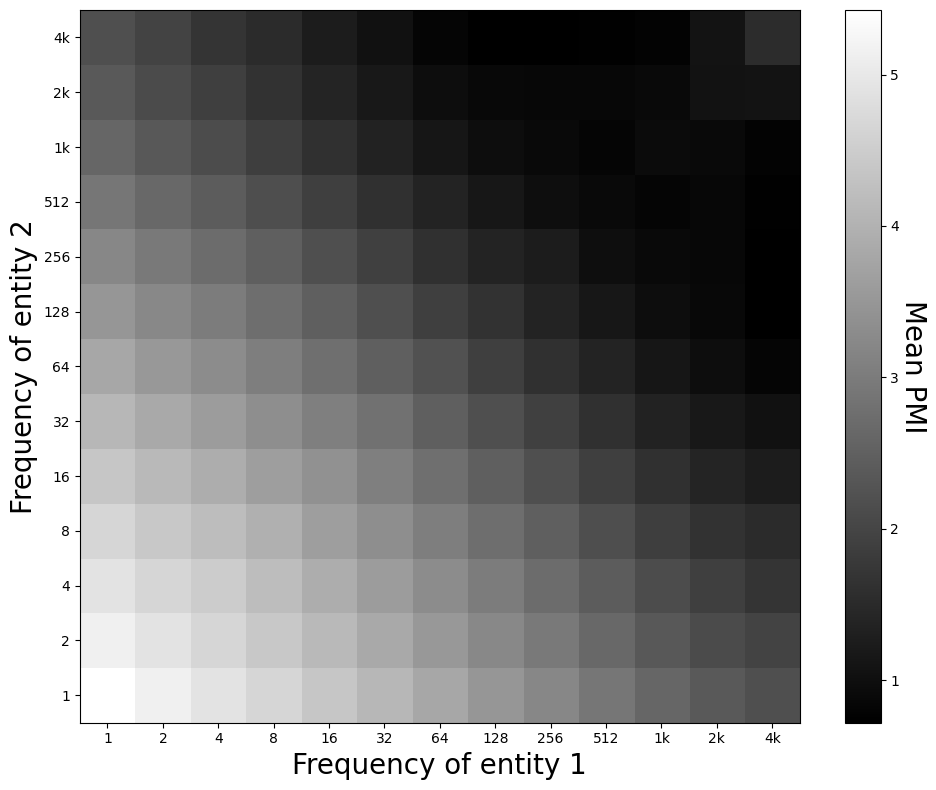

In [5]:
from sharedutils import visualize_pmi_by_frequency

visualize_pmi_by_frequency(model.cooccurrences_)

Roughly the same picture as for LotR, but there is a potential anomaly in the top right corner: some high frequent entities seem to be highly associated. Let us see what they are!

In [8]:
df = model.cooccurrences_
df[(df.entity_one_frequency >= 1000) & (df.entity_two_frequency >= 1000)].sort_values(by="pmi", ascending=False)

id entity_one  entity_one_frequency entity_two  \
21261    21262        GPT                  1143        GPT   
9064      9065     Google                  2210     Google   
67235    67236     OpenAI                  1053     OpenAI   
67854    67855     Google                  2210     OpenAI   
1681      1682        GPT                  1143     OpenAI   
18686    18687    the way                  1343    the way   
1338      1339         AI                  7324         AI   
1657      1658      a lot                  1372      a lot   
9066      9067        GPT                  1143     Google   
5991      5992         AI                  7324    the way   
6385      6386         AI                  7324     OpenAI   
90877    90878      a lot                  1372     Google   
7884      7885         AI                  7324     Google   
26499    26500    the way                  1343     OpenAI   
18597    18598         AI                  7324      a lot   
121597  121598    the way                  1343     Google   
5984      5985        GPT                  1143    the way   
8030      8031      a lot                  1372     OpenAI   
5983      5984         AI                  7324        GPT   
31309    31310    the way                  1343      a lot   
124372  124373        GPT                  1143      a lot   

        entity_two_frequency  frequency  doc_frequency    spread  \
21261                   1143        199            112  0.002137   
9064                    2210        653            320  0.006105   
67235                   1053        114             84  0.001603   
67854                   1053        199            104  0.001984   
1681                    1053         93             54  0.001030   
18686                   1343         96             58  0.001107   
1338                    7324       2812           1099  0.020968   
1657                    1372         97             78  0.001488   
9066                    2210        119             51  0.000973   
5991                    1343        409            223  0.004255   
6385                    1053        315            161  0.003072   
90877                   2210        118             75  0.001431   
7884                    2210        529            255  0.004865   
26499                   1053         45             36  0.000687   
18597                   1372        302            198  0.003778   
121597                  2210         82             59  0.001126   
5984                    1343         41             32  0.000611   
8030                    1053         34             26  0.000496   
5983                    1143        167             93  0.001774   
31309                   1372         35             33  0.000630   
124372                  1372         29             25  0.000477   

        adjusted_tf_idf first_occurrence last_occurrence       pmi  \
21261      91836.955752       2022-12-04      2023-01-28  1.609208   
9064      106456.772586       2022-12-05      2023-01-28  1.552576   
67235      69677.129412       2022-12-04      2023-01-26  1.438496   
67854      98834.057143       2022-12-07      2023-01-28  1.358480   
1681       87670.981818       2022-12-04      2023-01-27  1.314456   
18686      84392.203390       2022-12-04      2023-01-26  1.152567   
1338      133936.483636       2022-12-04      2023-01-29  1.145966   
1657       63690.531646       2022-12-06      2023-01-27  1.138511   
9066      118934.923077       2022-12-05      2023-01-22  1.099556   
5991       95464.714286       2022-12-04      2023-01-29  1.045347   
6385      101588.691358       2022-12-04      2023-01-28  1.037582   
90877      80686.894737       2022-12-07      2023-01-26  1.016583   
7884      108099.750000       2022-12-06      2023-01-28  0.940763   
26499      62327.783784       2022-12-04      2023-01-29  0.929156   
18597      79276.442211       2022-12-06      2023-01-29  0.904352   
121597     70756.200000       

Not high PMIs, but noticeable, between some highly frequent entities in the discourse like tech giants, _GPT_ and some generic high frequent entities like _the way_.

In [11]:
min_weight = 3.0

## Community detection

We will try to replicate the settings from the other analysis, but since the corpus is much bigger, we may have to adapt some hyperparameters.

In [12]:
from narrativegraphs import GraphFilter

graph_filter = GraphFilter(
    minimum_node_frequency=2
)

In [13]:
k_clique_comms = model.graph.find_communities(
    graph_filter=graph_filter,
    min_weight=min_weight,
    community_detection_method_args=dict(k=3)
)
k_clique_comms_with_contexts = []
k_clique_big_comm = None

for comm in sorted(k_clique_comms, key=lambda c: c.score, reverse=True):
    size = len(comm.members)
    if size < 2:
        continue
    if size > 1000:
        if k_clique_big_comm is not None:
            print("More than one giant community identified!")
        k_clique_big_comm = comm
        continue
    contexts = model.tuplets.get_contexts_by_entity_ids(comm.member_ids)
    contexts.sort(key=lambda c: c.doc_id)
    k_clique_comms_with_contexts.append((comm, contexts))

In [14]:
louvain_comms = model.graph.find_communities(
    graph_filter=graph_filter,
    community_detection_method="louvain",
    min_weight=min_weight,
    community_detection_method_args=dict(resolution=10)
)
louvain_comms_with_contexts = []

for comm in sorted(louvain_comms, key=lambda c: c.score, reverse=True):
    size = len(comm.members)
    if size < 2 or size > 1000 : continue
    contexts = model.tuplets.get_contexts_by_entity_ids(comm.member_ids)
    contexts.sort(key=lambda c: c.doc_id)
    louvain_comms_with_contexts.append((comm, contexts))

In [16]:
# Comparison
comms_by_method = {
    "k_clique": k_clique_comms_with_contexts,
    "louvain": louvain_comms_with_contexts
}
import numpy as np

# Extract sizes for each method
sizes_by_method = {
    method: [len(comm.members) for comm, contexts in comms_with_contexts]
    for method, comms_with_contexts in comms_by_method.items()
}

for name, comms in sizes_by_method.items():
    print(name)
    print("N:", len(comms))
    print("Mean:", np.mean(comms))
    print("Median:", np.median(comms))
    print()


k_clique
N: 7067
Mean: 5.384462997028442
Median: 4.0

louvain
N: 450
Mean: 44.87111111111111
Median: 45.0



Much the same picture. We will dig into the k-clique communities.

## k-clique communities

In [59]:
docs = model.documents_
doc_id_to_timestamp = {
    doc_id: timestamp
    for doc_id, timestamp in zip(docs.id, docs.timestamp)
}

In [61]:
spike_values, spread_values = [], []
for comm, contexts in k_clique_comms_with_contexts:
    ids = {c.doc_id for c in contexts}
    spike_values.append(len(ids))
    dates = [doc_id_to_timestamp[context.doc_id] for context in contexts]
    spread_values.append((max(dates) - min(dates)).days + 1)

    
single_spike_count = sum(1 for sv in spike_values if sv == 1)
print('Single spike count:', single_spike_count, 'out of total', len(k_clique_comms_with_contexts))

Single spike count: 5552 out of total 7067


In [43]:
from sharedutils import print_comm_with_contexts

single_spiked_comms = []

for (comm, contexts), sv in zip(k_clique_comms_with_contexts, spike_values):
    if sv > 1: continue
    single_spiked_comms.append((comm, contexts))
    print_comm_with_contexts(comm, contexts)

COMMUNITY: the largest kind, a complex way, Guinea
ID: 43533, OFFSET: 0
I asked it what the largest kind of Guinea pig is and it said an English lop. I then realized it likely confused some article that had rabbits and Guinea pigs in it.

It might be doing it in a complex way, but it's still cobbling together info to form a semi coherent statement.

COMMUNITY: unsupervised training, completely different contexts, supervised training
ID: 49299, OFFSET: 19
There is supervised training and unsupervised training. These are used in completely different contexts. You are talking of unsupervised training, and GPT is using supervised training.

COMMUNITY: the alcohol, that nutmeg, the cocaine
ID: 17156, OFFSET: 0
Gotta get that nutmeg narcotic hit to balance the cocaine high from the pure unprocessed coca leaves and the alcohol from the vanilla, almond, and bitters.

COMMUNITY: Interesting, thanks, WuDao2, TB
ID: 19839, OFFSET: 0
Interesting, thanks for bringing that up. But I read "Yet, it’s 

Many appear meaningful in the context of ChatGPT discussions, others less so.

The nature of the data is quite different from a literary work. Their ordering is very different since their are comments from a thread, and we have currently detached them from their immediate context. Be that as it may, at least for now, we may be able to see whether and how the comments connect to the general topic, namely ChatGPT and large language models.

In [26]:
top_500 = model.entities_.sort_values(by="doc_frequency", ascending=False)[:500]
top_500_entity_ids = set(top_500.id)

In [34]:
from tqdm.auto import tqdm

def connection_score(comm):
    graph_context = model.graph.expand_from_focus_entities(comm.member_ids, "cooccurrence")
    top_connected = sum(1 for node in graph_context.nodes
                        if node.id in top_500_entity_ids)
    return top_connected / len(comm.members)

connection_scores = [connection_score(comm) for comm, _ in tqdm(single_spiked_comms)]

  0%|          | 0/5552 [00:00<?, ?it/s]

In [40]:
sorted_single_spike_comms = [
    (comm, contexts)
    for (comm, contexts), score in
    sorted((comm_contexts_score for comm_contexts_score in zip(single_spiked_comms, connection_scores)),
           key=lambda x: x[1],
           reverse=True)
]

In [44]:
# looking at the top
for comm, contexts in sorted_single_spike_comms[:50]:
    print_comm_with_contexts(comm, contexts)

COMMUNITY: social media, an attachment, Facebook, Instagram
ID: 35563, OFFSET: 343
A lot of us lament about social media... But ultimately we are all to some extent addicted. I don't use Facebook, Instagram, tick-tock (because I hate social media)... But I still use Reddit a social media website.

Perhaps you may not be willing to get an AI girlfriend or friend... But maybe you might develop an attachment to an AI assistant or something.



COMMUNITY: a scripting language, a chat bot, the command line
ID: 16963, OFFSET: 1387
Shit, people are literally running computers in this "chat bot" because it's capable of things like data storage and running scripts and commands...Sure it's just *replying to the user with what it found to be the best response*, but that's what makes it incredible. The reply shows the data being parsed and an understanding of the appropriate response. If this AI were built into, say a command line, then you could reasonably run ANYTHING, regardless of language, re

In [47]:
# looking at the bottom
for comm, contexts in sorted_single_spike_comms[-50:]:
    print_comm_with_contexts(comm, contexts)

COMMUNITY: core class, a letter grade, the midterm
ID: 46716, OFFSET: 146
 If you blew the midterm you were fucked.  The silver lining being you didn't have to worry about that class.  Retake if core class, if elective choose pass/not pass instead of letter grade.

COMMUNITY: 50 cents, virtual numbers, SM
ID: 7034, OFFSET: 107
" Yes, you can buy a virtual number using bitcoin lightning here: [https://lnvpn.net/phone-numbers](https://lnvpn.net/phone-numbers). For 50 cents it gives you a number that only works one time, for receiving the SMS from OpenAI. I used it and it works."

From chatgpt itself:



COMMUNITY: physics class, slide rules, todays dollars
ID: 2566, OFFSET: 76
   At first they were banned - in physics class we were still taught and required to master slide rules.  Obviously, things changed and the were soon embraced. I remember my first $100 Casio - ($523 in todays dollars). 



COMMUNITY: 3am, 2 weeks ago, a deadline
ID: 43176, OFFSET: 11
Not random spot tests if you re

Indeed, it seems that the more unconnected communities are generally not part of a common narrative about language models.

## Multi-spike micro-narratives

Here we dig into those micro-narratives with some degree of recurrence. But before doing so, we need to address something common on SoMe data: duplicates.

They could have been removed earlier on, but given that they are from distinct comments, the duplication of content is meaningful in its own way. However, it does also distort the picture of micro-narratives, so we are going to put them to the side as their own class.

In [100]:
from rapidfuzz import fuzz
from itertools import combinations

duplicate = []  # False or True to locate them in a df
for comm, contexts in k_clique_comms_with_contexts:
    if len(contexts) == 1:
        duplicate.append(0)
    else:
        texts = [c.text for c in contexts]
        duplicate.append(
            np.mean(
                [fuzz.partial_ratio(a, b)
                 for a, b in combinations(texts, 2)]
            )
        )

In [105]:
sum(1 for v in duplicate if v >= 85)

117

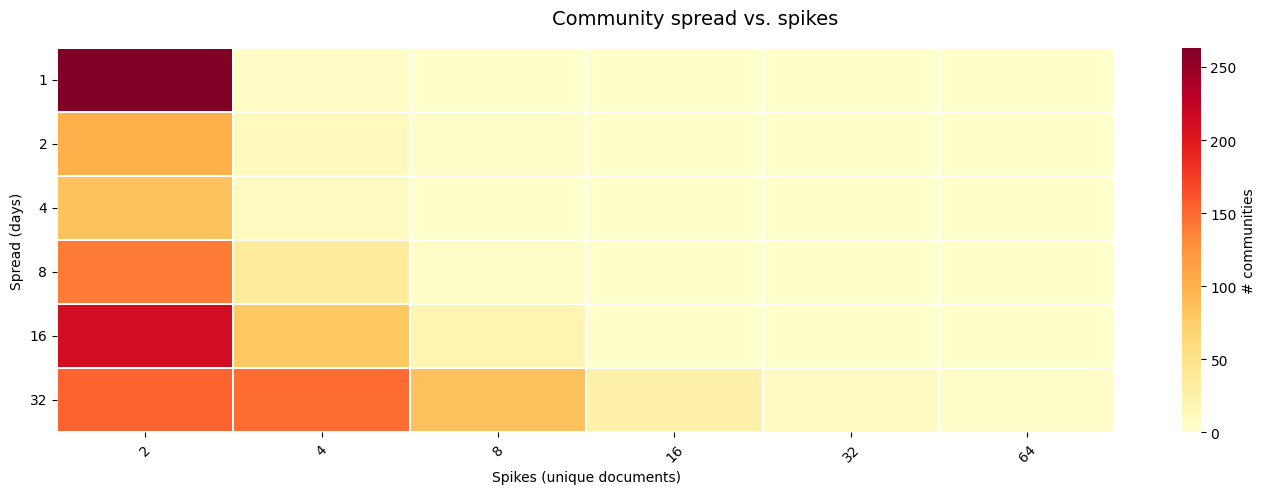

In [106]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 5))

df = pd.DataFrame(dict(spikes=spike_values, spread=spread_values))
df = df[[v < 85 for v in duplicate]]
# remove single spikes
df = df[df.spikes > 1]  

log_base = 2
df["floored_log_spread"] = np.floor(np.emath.logn(log_base, df.spread))
df["floored_log_spikes"] = np.floor(np.log2(df.spikes))

# Pivot to a 2D count matrix
heat = (
    df.groupby(["floored_log_spread", "floored_log_spikes"], observed=True)
    .size()
    .unstack(fill_value=0)
)

# Readable tick labels: use bin midpoints
x_labels = [f"{int(2 ** b)}" for b in heat.columns]
y_labels = [f"{int(log_base ** b)}" for b in heat.index]

sns.heatmap(
    heat,
    ax=ax,
    cmap="YlOrRd",
    xticklabels=x_labels,
    yticklabels=y_labels,
    linewidths=0.3,
    linecolor="white",
    cbar_kws={"label": "# communities"},
)

ax.set_xlabel("Spikes (unique documents)")
ax.set_ylabel("Spread (days)")
ax.tick_params(axis="x", rotation=45)
ax.tick_params(axis="y", rotation=0)

plt.suptitle("Community spread vs. spikes", fontsize=14)
plt.tight_layout()
plt.show()

In [107]:
def activation_score(comm, contexts):
    """A score function to surface those micro-narratives that are the strongest activated in across their contexts"""
    members = {e.id for e in comm.members}
    scores = []
    for context in contexts:
        activated = {e.id for tuplet in context.tuplets
                     for e in [tuplet.entity_one, tuplet.entity_two]}
        scores.append(len(activated) / len(members))
    return np.mean(scores)

def slice_micro_narratives(min_spread, max_spread, min_spikes, max_spikes):
    sliced_df = df[
        (min_spread <= df.spread) & 
        (df.spread < max_spread) & 
        (min_spikes <= df.spikes) & 
        (df.spikes < max_spikes)
        ]
    print('Number of comms:', len(sliced_df))
    micro_narratives = [k_clique_comms_with_contexts[row[0]] for row in sliced_df.iterrows()]
    micro_narratives.sort(key=lambda tpl: activation_score(*tpl), reverse=True)
    return micro_narratives
    

def print_micro_narratives(min_spread, max_spread, min_spikes, max_spikes):
    for comm, context in slice_micro_narratives(min_spread, max_spread, min_spikes, max_spikes):
        print_comm_with_contexts(comm, context)

### Same day or within a week, two or three spikes: quote+response, similar comment or point

In [108]:
print_micro_narratives(1, 2, 2, 4)

Number of comms: 263
COMMUNITY: one interface, the logic, just a demo, WolframAlpha, [https://huggingface.co/spaces/JavaFXpert/Chat-GPT-LangChain](https://huggingface.co/spaces/JavaFXpert/Chat-GPT-LangChain
ID: 27170, OFFSET: 0
Someone combined GPT-3 and WolframAlpha into one interface to solve these kinds of issues - there is some logic determining if this answer needs WolframAlpha and if it does then it is consulted. This is just a demo, but I think this is the way to go to make large language models smarter and really combining vastly different specialized AI models into a cohesive unit is the way forward to achieve AGI eventually. 

[https://huggingface.co/spaces/JavaFXpert/Chat-GPT-LangChain](https://huggingface.co/spaces/JavaFXpert/Chat-GPT-LangChain)
ID: 27207, OFFSET: 0
Someone combined GPT-3 and WolframAlpha into one interface - there is some logic determining if this answer needs WolframAlpha and if it does then it is consulted. This is just a demo, but I think this is the wa

In [109]:
print_micro_narratives(2, 8, 2, 4)

Number of comms: 185
COMMUNITY: undergraduate papers, an old friend, a tenured professor, his department, a cat and mouse game
ID: 37712, OFFSET: 327
You don't need to bother; an old friend who's a tenured professor told me his department is ceasing to assign undergraduate papers this year. Because this tech crossed their threshold for being better at writing papers at this level than the average frosh.
ID: 37815, OFFSET: 0
&gt;You don't need to bother; an old friend who's a tenured professor told me his department is ceasing to assign undergraduate papers this year.

It's funny because people in this thread are discussing the cat and mouse game when this solution immediately pops up. If AI gets too good, they'll just stop assigning papers, and people that cheat will be completely fucked.

COMMUNITY: the interaction, a new life Form, your other point, general intelligence
ID: 32961, OFFSET: 230
And to your other point. I believe only through general intelligence we can create a new lif

### More than a week, two or three spikes: similar comment or point

In [113]:
print_micro_narratives(8, 14, 2, 4)

Number of comms: 111
COMMUNITY: a new language, their pocket, a super computer
ID: 6440, OFFSET: 155
Now, everyone has a super computer in their pocket that can do mathematics, keep track of their calendar , teach them new languages , etc.
ID: 36089, OFFSET: 405
because the reality is mental arithmetic is useless now because people have super computers in their pocket. If the same happens with writing pros then we need to move our education system away from teaching that as heavily.

COMMUNITY: Kodak, the business model, a pioneer
ID: 12757, OFFSET: 22
Kodak was a pioneer of digital photography as well. They did not promote it because they were happy with their existing business model.
ID: 34353, OFFSET: 66
That's why they're treading cautiously because if you give users  a system that provides near perfect answers and they don't go around clicking a bunch of links it kinda breaks you're business model.

I see this as a Kodak Digital  vs. Kodak film crossroads, do you create a better s

In [114]:
print_micro_narratives(14, 100, 2, 4)

Number of comms: 397
COMMUNITY: some sci-fi shit, our thoughts, our minds
ID: 22904, OFFSET: 126
That said, playing with ChatGPT really makes you wonder how many of our thoughts and feeling are "native" and how many are influenced/generated by the narratives we build in our minds.
ID: 33337, OFFSET: 0
Eventually the AI will infiltrate our minds and create our thoughts for us or some sci-fi shit.
ID: 33338, OFFSET: 0
Eventually the AI will infiltrate our minds and create our thoughts for us or some sci-fi shit.

COMMUNITY: the current time, What a time, your device
ID: 19842, OFFSET: 1707
What time is it? 

I am a machine learning model, I do not have the ability to know the current time.
If you are looking for the current time, you can check the time on your device or check a time website or service.
ID: 47349, OFFSET: 0
It is not connected to the Internet, and it doesn't have access to the current time, so how would it know to add 1 year, and not 2 or 3. Just ask it "what time is it" 

### Same day or within a week, multiple spikes: common theme discussions

In [110]:
print_micro_narratives(1, 2, 4, 100)

Number of comms: 6
COMMUNITY: a scientific perspective, an engineer, an engineering perspective, Yann, a scientist, the perspective
ID: 44647, OFFSET: 0
It is revolutionary from an engineering perspective; but only evolutionary from a scientific perspective. Yann is a scientist more than an engineer so comes at it with that perspective.
ID: 44650, OFFSET: 0
From an engineering perspective it is revolutionary; from a scientific perspective it is evolutionary.
ID: 44652, OFFSET: 0
It is revolutionary from an engineering perspective; but only evolutionary from a scientific perspective. Yann is a scientist more than an engineer so comes at it with that perspective.
ID: 44768, OFFSET: 0
It is revolutionary from an engineering perspective; but only evolutionary from a scientific perspective. Yann is a scientist more than an engineer so comes at it with that perspective.
ID: 44786, OFFSET: 45
There are people who advance theory and those who advance practice and Yann is looking at this invent

In [111]:
print_micro_narratives(2, 8, 4, 100)

Number of comms: 25
COMMUNITY: a good wage, 30$ and hour, California
ID: 46071, OFFSET: 0
30$ and hour is not out on the street wages in California. That’s bullshit.
ID: 46138, OFFSET: 136
But California is huge. And while it is expensive, 30$ and hour in a majority of the state is not living on the streets money
ID: 46163, OFFSET: 0
All I’m saying is that 30$ and hour is a good and livable wage in large parts of California. Which is true. 

But it’s not true for the major metro areas.
ID: 46168, OFFSET: 38
In California. 

It’s expensive here for sure. But 30$ and hour is a good wage where I live. In California

COMMUNITY: math courses, open book, an exam, any other exams
ID: 36067, OFFSET: 0
In my engineering classes, we couldn’t use a calculator in our first few math classes and such, but eventually every exam is open book, with programming and calculators. At a point, the problems are complex enough you can’t plug them into a calculator. The exams are challenging enough that no tex

### More than a week, multiple spikes: recurring themed discussions, sticky comments/points

In [115]:
print_micro_narratives(8, 14, 4, 100)

Number of comms: 30
COMMUNITY: Discord, the servers, the specific image, credit card
ID: 8758, OFFSET: 0
Discord, And no you can't link to something in discord without being in the server yourself. Otherwise it won't go through.

https://discord.com/channels/974519864045756446/977259063052234752/1062169050827984956


ID: 8873, OFFSET: 0
I see, if you’re willing to download a program called Discord, that’s how they are communicating. There is likely a server for their company that interfaces with the public.

I’m not sure where the link for the Discord is, and I checked their website and there isn’t an obvious way to contact them otherwise.


ID: 19524, OFFSET: 311
The API is able to access the specific image on Discord because it is able to reach the server where the image is hosted. However, if the server is down, the API is not able to retrieve the information and the link will not work.
ID: 21473, OFFSET: 349
Just needs an API key from OpenAI you can get here: [https://beta.openai.c

In [116]:
print_micro_narratives(14, 100, 4, 100)

Number of comms: 382
COMMUNITY: AMP, OP, the Open Web](https://www.reddit.com/r/AmputatorBot/comments, the canonical page, About)](https://www.reddit.com, /r/AmputatorBot/comments/ehrq3z/why_did_i_build_amputatorbot)^
ID: 42727, OFFSET: 0
It looks like you shared an AMP link. These should load faster, but AMP is controversial because of [concerns over privacy and the Open Web](https://www.reddit.com/r/AmputatorBot/comments/ehrq3z/why_did_i_build_amputatorbot).

Maybe check out **the canonical page** instead: **[https://nypost.com/2005/10/22/degree-of-stupidity-wal-mart-heir-head-cheated-at-usc/](https://nypost.com/2005/10/22/degree-of-stupidity-wal-mart-heir-head-cheated-at-usc/)**

*****

 ^(I'm a bot | )[^(Why &amp; About)](https://www.reddit.com/r/AmputatorBot/comments/ehrq3z/why_did_i_build_amputatorbot)^( | )[^(Summon: u/AmputatorBot)](https://www.reddit.com/r/AmputatorBot/comments/cchly3/you_can_now_summon_amputatorbot/)
ID: 49253, OFFSET: 0
It looks like you shared an AMP link. 